### Lesson 8.9
---

In [3]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html


# Read in the data.
data = np.asarray(pd.read_csv('data_q.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X,
                y,
                test_size=0.25,
                random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train, y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)

In [4]:
acc

0.9583333333333334

Supplementary

In [1]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [2]:
from sklearn.metrics import accuracy_score

### Lesson 8.10
---

In [60]:
# Reading the csv file
import pandas as pd
data = pd.read_csv("data_q1.csv")

# Splitting the data into X and y
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Import statement for train_test_split
from sklearn.model_selection import train_test_split

# TODO: Use the train_test_split function to split the data into
# training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# The size of the testing set should be 20% of the total size of the data.
# Your output should contain 4 objects.

### Lesson 9.10
---

In [5]:
from sklearn.metrics import f1_score

In [6]:
F1 = 2 * (55.6 * 83.3) / (55.6 + 83.3)

In [7]:
F1

66.68797696184305

### Lesson 10.4
---

In [20]:
from sklearn.model_selection import KFold

In [24]:
X = np.array([[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4]])
y = np.array([1, 2, 3, 4])

In [26]:
kf = KFold(4,True,3)

In [27]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [28]:
X_train

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [4, 4, 4, 4]])

In [29]:
X_test

array([[3, 3, 3, 3]])

In [30]:
y_train

array([1, 2, 4])

In [31]:
y_test

array([3])

### Lesson 10.6
___

Detecting Overfitting and Underfitting with Learning Curves

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [64]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

# ------------ [ Helper function for graphing Learning Curves] -------------- #
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [55]:
df = pd.read_csv('data_q10_a.csv')

In [56]:
df.head()

,x1,x2,y
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0


In [57]:
X = np.array(df[['x1', 'x2']])

In [58]:
y = np.array(df['y'])

In [59]:
np.random.seed(55)

In [71]:
### Logistic Regression
#estimator = LogisticRegression()

### Decision Tree
estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)

To properly evaluate, be sure to flip the graph upside down since we are using _SCORE_ rather than _error_.

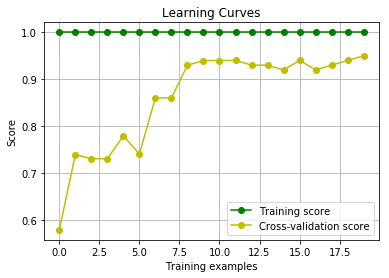

In [72]:
draw_learning_curves(X, y, estimator, 20)